#### Pandas

In [63]:
%pip show pandas

Name: pandas
Version: 2.3.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

 Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
 All rights reserved.

 Copyright (c) 2011-2023, Open source contributors.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contribut

In [64]:
import pandas as pd  # pandas python package를 pd라고 별명을 부여

#### 데이터 구조 : Series, DataFrame

In [65]:
# Series : 모든 데이터 유형(정수, 문자열, 부동 소수점 숫자, Python 객체 등)을 저장할 수 있는 
# 1차원 레이블이 지정된 배열. 
# s = pd.Series(data, index=index), data=dict, ndarray, scalar
# randn() :평균이 0이고, 표준편차가 1인 정규분포(가우시안 분포) 에서 난수를 생성
d = {"b": 1, "a": 0, "c": 2}
s1 = pd.Series(d)
print('---------------s1---')
print(s1)

import numpy as np

s2 = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
print('---------------s2---')
print(s2)

s3 = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
print('---------------s3---')
print(s3)

---------------s1---
b    1
a    0
c    2
dtype: int64
---------------s2---
a    0.826905
b   -0.297956
c    0.141366
d    1.645788
e    0.778634
dtype: float64
---------------s3---
a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64


#### Series 활용

In [66]:

print(s1["a"])
s1["e"] = 12.0  #추가됨
print(s1)
print("e" in s1)
print("f" in s1)


0
b     1.0
a     0.0
c     2.0
e    12.0
dtype: float64
True
False


In [67]:
print(s2.iloc[0])
print(s2.iloc[:3])
print(s2[s2 > s2.median()])
print(s2.iloc[[4, 3, 1]]) #4,3,1위치의 데이터 가져옴

0.8269053364482254
a    0.826905
b   -0.297956
c    0.141366
dtype: float64
a    0.826905
d    1.645788
dtype: float64
e    0.778634
d    1.645788
b   -0.297956
dtype: float64


In [68]:
# DataFrame:서로 다른 유형의 열을 가진 2차원 레이블이 지정된 데이터 구조.
# 스프레드시트, SQL 테이블, Series 객체의 딕셔너리

d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)
print(df)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


In [69]:
df = pd.DataFrame(d, index=["d", "b", "a"])
print(df)
print('-'*30)
df = pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])
print(df)

   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0
------------------------------
   two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN


In [70]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

df = pd.DataFrame(d)
print(df)
print('-'*30)

df = pd.DataFrame(d, index=["a", "b", "c", "d"])
print(df)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
------------------------------
   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


#### CSV 파일 읽기 -> DataFrame

In [71]:
df = pd.read_csv('data/mpg.csv') 
print(type(df)) # 데이터 타입 확인
display(df.head(3)) # 앞부분 기준 최초 3개의 레코드
display(df.tail(3)) # 뒷부분 기준 마지막 3개의 레코드

<class 'pandas.core.frame.DataFrame'>


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [72]:
print(df.shape) # 크기확인
print(df.shape[0]) #행
print(df.shape[1]) #열
print(df.columns)
print(df.dtypes)

(234, 11)
234
11
Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')
manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
category         object
dtype: object


In [73]:
#새로운 컬럼생성, 연비의 합계 산출
df['total'] = df['cty'] + df['hwy']
df.info() #자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
 11  total         234 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [74]:
# total 연비의 총합,평균
print(df['total'].sum())
print(df['total'].mean())
print(round(df['total'].mean(), 4))

# describe(): 
# count: 데이터수, 과목별 성적의 수
# mean: 평균, 과목별 평균
# std: 표준 편차, 값이 크면 성적이 넓게 퍼짐
# min: 최소값, 가장 낮은 성적
# 25%: 25/100 지점의 값
# 50%: 50/100 지점의 값, 중앙값, median
# 75%: 75/100 지점의 값
# max: 100/100 지점의 값, 최대값
display(df.describe())

9430
40.2991452991453
40.2991


,displ,year,cyl,cty,hwy,total
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171,40.299145
std,1.291959,4.509646,1.611534,4.255946,5.954643,10.100580
min,1.600000,1999.000000,4.000000,9.000000,12.000000,21.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000,31.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000,41.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000,47.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000,79.000000


#### 데이터 추출하기 : loc, iloc

In [75]:
df = pd.read_csv('data/gapminder.tsv', sep='\t')
display(df.head())
print(df.shape)

# loc 속성으로 행 단위 데이터 추출하기, index로 추출
print(df.loc[0])
print('-'*50)
print(df.loc[99])
# print(df.loc[-1]) #존재하지 않는 index라 오류

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


(1704, 6)
country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object
--------------------------------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object


In [76]:
# iloc 속성으로 행 데이터 추출하기,행 위치, 행번호로 추출
print(df.iloc[1])
print('-'*50)
print(df.iloc[99])
print('-'*50)
print(df.iloc[-1]) #인덱스값이 아니라 행위치로 마지막 위치를 나타냄

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object
--------------------------------------------------
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object
--------------------------------------------------
country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [77]:
#슬라이싱 구문으로 데이터 추출하기(loc, iloc)
subset = df.loc[:, ['year', 'pop']] 
display(subset.head())
print(type(subset))
subset = df.iloc[:, [2, 4, -1]] 
display(subset.head())

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


<class 'pandas.core.frame.DataFrame'>


,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


#### 그룹화

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64
<class 'pandas.core.series.Series'>
Axes(0.125,0.11;0.775x0.77)


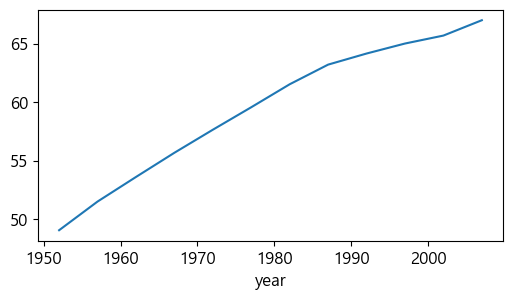

In [78]:
# 그룹화한 데이터 평균 구하기(연도별 lifeExp 평균)
print(df.groupby('year')['lifeExp'].mean())

grouped_year_df = df.groupby('year')['lifeExp'].mean()
print(type(grouped_year_df))
print(grouped_year_df.plot())   

In [79]:
# 연도,지역별 lifeExp, gdpPercap의 평균구하기(그룹화)
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean() 
display(multi_group_var)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

#### Numpy

In [80]:
%pip show numpy

Name: numpy
Version: 2.3.3
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2025, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the above copyright
        notice, this list of conditions and the following disclaimer.

     * Redistributions in binary form must reproduce the above
        copyright notice, this list of conditions and the following
        disclaimer in the documentation and/or other materials provided
        with the distribution.

     * Neither the name of the NumPy Developers nor the names of any
        contributors may be used to endorse or promote products derived
        from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED

In [81]:
import numpy as np

In [82]:
# 배열 형태
a1 = np.array([1, 2, 3])
print(a1)
print('array1 type : ', type(a1))
print('array1 shape : ', a1.shape)

a2 = np.array([[1, 2, 3], [4, 5, 6]])
print(a2)
print('array2 type : ', type(a2))
print('array2 shape : ', a2.shape)

a3 = np.array([[1, 2, 3]])
print(a3)
print('array3 type : ', type(a3))
print('array3 shape : ', a3.shape)

[1 2 3]
array1 type :  <class 'numpy.ndarray'>
array1 shape :  (3,)
[[1 2 3]
 [4 5 6]]
array2 type :  <class 'numpy.ndarray'>
array2 shape :  (2, 3)
[[1 2 3]]
array3 type :  <class 'numpy.ndarray'>
array3 shape :  (1, 3)


In [83]:
# 배열 차원
print('array1 dim :', a1.ndim)
print('array2 dim :', a2.ndim)
print('array3 dim :', a3.ndim)

array1 dim : 1
array2 dim : 2
array3 dim : 2


In [84]:
# arange 함수
a = np.arange(20) 
print(a)
a = np.arange(1, 20, 3) 
print(a)

# zeros, ones 함수
zero_a = np.zeros((2,5)) #2행 5열
one_a = np.ones((3,4)) #3행 4열

print(zero_a)
print(one_a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1  4  7 10 13 16 19]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [85]:
# ones_like, zeros_like 함수
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

# arr과 같은 크기·dtype이지만 값이 전부 0인 배열 생성
zeros_arr = np.zeros_like(arr)

print("원본 배열:\n", arr)
print("zeros_like 결과:\n", zeros_arr)

# arr과 같은 크기·dtype이지만 값이 전부 1인 배열 생성
ones_arr = np.ones_like(arr)

print("원본 배열:\n", arr)
print("ones_like 결과:\n", ones_arr)

원본 배열:
 [[1 2 3]
 [4 5 6]]
zeros_like 결과:
 [[0 0 0]
 [0 0 0]]
원본 배열:
 [[1 2 3]
 [4 5 6]]
ones_like 결과:
 [[1 1 1]
 [1 1 1]]


In [86]:
# full:모든값을 특정값인 배열 생성, random:임의의 값으로 채워진 배열 생성
full_a = np.full((4, 3),9) # 4행 3열에 9로 채워진 배열
random_a = np.random.random((3, 4)) # 3행 4열, 0~1보다 작은값 채워진 배열 생성

print(full_a)
print(random_a)

# eye함수 :주대각선이 1인 나머지0인 배열 생성
eye_a = np.eye(4) # 4행4열
print(eye_a)

[[9 9 9]
 [9 9 9]
 [9 9 9]
 [9 9 9]]
[[0.23930188 0.12902019 0.11645986 0.38850087]
 [0.5436796  0.32078371 0.02708164 0.22488823]
 [0.32761318 0.73986274 0.82198355 0.34855017]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [87]:
# 배열 크기 변형 : reshape 함수
array1 = np.arange(12)
print('array1:\n', array1)

array2 = array1.reshape(3,4)
print('array2:\n', array2)

array3 = array1.reshape(3,4,order='F') #order='F':값을 열부터 채운다
print('array3:\n', array3)

array1:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
array2:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
array3:
 [[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]


In [88]:
# -1은 기존 배열과 호환되는 크기로 자동변환
array1 = np.arange(10) # 1차원
array2 = array1.reshape(-1, 5) # 열이 5이고, 행은 알아서 계산

print(array2)
print('array2 dim : ', array2.ndim)
print('array2 shape : ', array2.shape)

# flatten : 1차원 변형
array3 = array2.flatten()
print(array3)

[[0 1 2 3 4]
 [5 6 7 8 9]]
array2 dim :  2
array2 shape :  (2, 5)
[0 1 2 3 4 5 6 7 8 9]


#### 데이터 추출 : 단일값, 슬라이싱

In [89]:
# 단일값 추출
array1 = np.arange(1, 10)
array2 = array1.reshape(3, 3)
print('array2 :\n', array2)

value1 = array2[0,0]
value2 = array2[-1, -1]
value3 = array2[-1, -2]

print(value1)
print(value2)
print(value3)

array2 :
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
1
9
8


In [90]:
# 1차원 배열 슬라이싱 추출
array1 = np.arange(1, 10)
array2 = array1[0:3]
array3 = array1[:3]
array4 = array1[3:]

print(type(array2))
print(array2)
print(array3)
print(array4)

# 다차원 배열 슬라이싱 추출
array1 = np.arange(1, 10)
array2 = array1.reshape(3, 3)
print('array2 : \n', array2)

print('array2[0:2, 0:2]\n', array2[0:2, 0:2])
print('array2[1:3, 0:3]\n', array2[1:3, 0:3])
print('array2[:2, 1:]\n', array2[:2, 1:])
print('array2[:2, 0]\n', array2[:2, 0])

<class 'numpy.ndarray'>
[1 2 3]
[1 2 3]
[4 5 6 7 8 9]
array2 : 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
array2[0:2, 0:2]
 [[1 2]
 [4 5]]
array2[1:3, 0:3]
 [[4 5 6]
 [7 8 9]]
array2[:2, 1:]
 [[2 3]
 [5 6]]
array2[:2, 0]
 [1 4]


##### 기술통계

In [91]:
# 데이터 계수
x = np.array([18,   5,  10,  23,  19,  -8,  10,   0,   0,   5,   2,  15,   8,
              2,   5,   4,  15,  -1,   4,  -7, -24,   7,   9,  -6,  23, -13])

len(x)

# 평균, 분산, 표준편차
print(np.mean(x))
print(np.var(x))
print(np.std(x))

# 최대값, 최소값, 중앙값
print(np.max(x))
print(np.min(x))
print(np.median(x))

# 사분위수
print(np.percentile(x, 25))
print(np.percentile(x, 50))
print(np.percentile(x, 75))

4.8076923076923075
115.23224852071006
10.734628476137871
23
-24
5.0
0.0
5.0
10.0


#### Matplotlib

In [92]:
# 경고 메세지 숨김
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [93]:
import platform 

if (platform.system() == 'Windows'):  # Windows
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
elif platform.system() == 'Darwin':  # macOS는 Darwin으로 표시됨
    # macOS 기본 한글 폰트 (AppleGothic)
    plt.rc('font', family='AppleGothic')
    path = '.'    
else: # 코렙 
    plt.rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/ai/core' # Colab

plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (6, 3) # 6:3의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

In [94]:
df = pd.read_csv('data/mpg.csv')
display(df.head(3))
# 배기량기준 고속도로 연비의 분포는?
df[['displ', 'hwy']]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


,displ,hwy
0,1.8,29
1,1.8,29
2,2.0,31
3,2.0,30
4,2.8,26
...,...,...
229,2.0,28
230,2.0,29
231,2.8,26
232,2.8,26


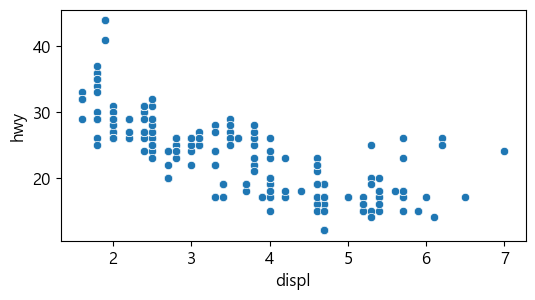

In [95]:
# 변수가 2개이면 산점도 표현 가능
sns.scatterplot(data=df, x='displ', y='hwy');
# 배기량이 증가할 수록 고속연비는 연비는 감소한다.

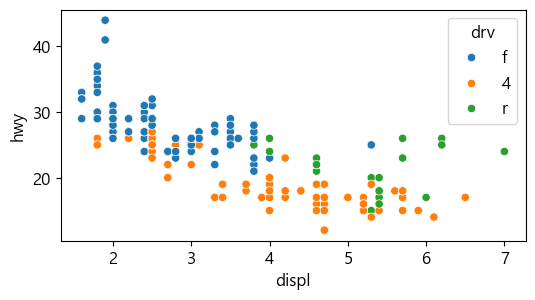

In [96]:
# 구동 방식별 구분
# 전륜(f) 구동이 가장 연비가 좋음.
sns.scatterplot(data=df, x='displ', y='hwy', hue='drv');

In [97]:
# 구동 방식별 고속도로 연비 평균
df_drv = df.groupby('drv').agg(hwy_mean=('hwy','mean'))
print(type(df_drv))
display(df_drv)  # drv가 인덱스

<class 'pandas.core.frame.DataFrame'>


,hwy_mean
drv,
4,19.174757
f,28.160377
r,21.000000


In [98]:
# as_index=False 로 인해 'drv'가 일반 컬럼으로 유지됨
df_drv = df.groupby('drv', as_index=False).agg(hwy_mean=('hwy','mean'))
df_drv

,drv,hwy_mean
0,4,19.174757
1,f,28.160377
2,r,21.000000


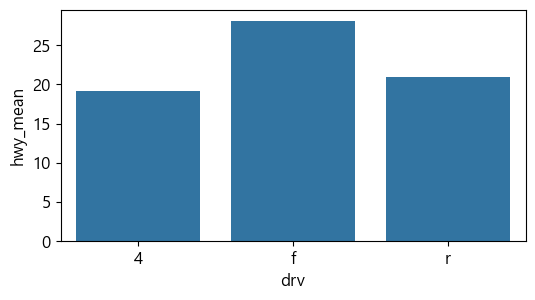

In [99]:
# 막대그래프
sns.barplot(data=df_drv, x='drv', y='hwy_mean');

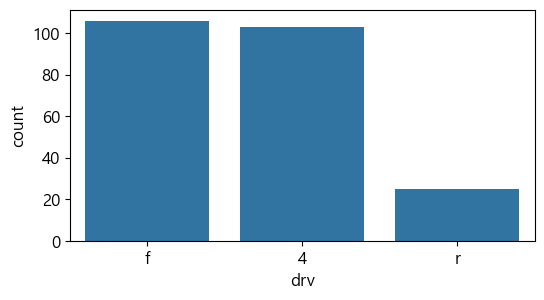

In [100]:
# sns.countplot() 빈도 막대 그래프 , 원자료 사용
sns.countplot(data=df, x='drv');

In [101]:
# 선 그래프 - 시간에 따른 데이터 표현
# 시계열 그래프
economics = pd.read_csv('data/economics.csv')
display(economics.head())
economics.info()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


<Axes: xlabel='date', ylabel='unemploy'>

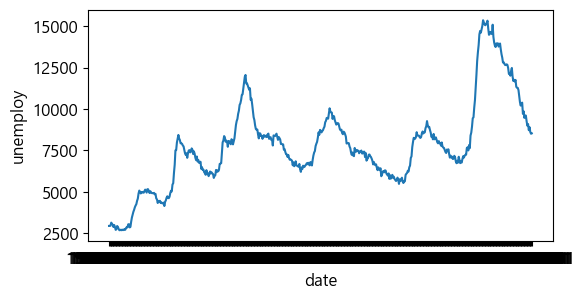

In [102]:
# 날짜 표시 안됨 : date -> object 타입
sns.lineplot(data = economics, x = 'date', y = 'unemploy') 

In [103]:
# x축에 연도 표시하기
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
print(economics.info())
economics[['date', 'date2']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB
None


,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [104]:
# 월 추출
print(economics['date2'].dt.month)
# 일 추출
print(economics['date2'].dt.day)
# 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32


,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


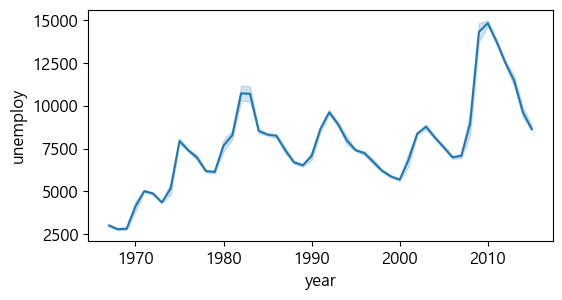

In [105]:
# x축에 연도 표시, 선 주위에  변동범위(신뢰구간)표시된다.
sns.lineplot(data = economics, x = 'year', y = 'unemploy');

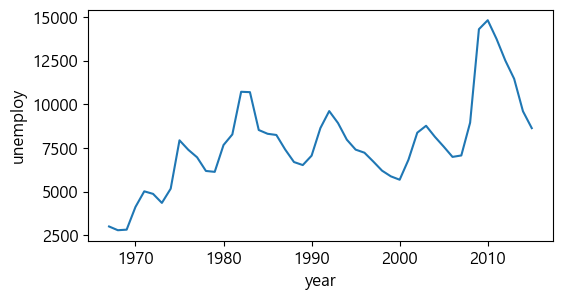

In [106]:
# 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar = None);

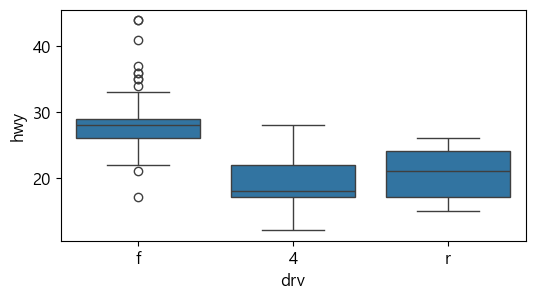

In [107]:
# 집단 간 분포 차이 표현하기
# 상자 그림 만들기 (구동방식별 고속도로 연비)
sns.boxplot(data = df, x = 'drv', y = 'hwy');